<h1>Importing required python libraries</h1>

In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

<h1>Reading dataset</h1>

In [101]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1c4c96aea9c6422fa909a87f6b1f250f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FongnSjwh7eS7MnGv-D88Jaq1srge0lIBClUXu1YUfqE',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1c4c96aea9c6422fa909a87f6b1f250f.get_object(Bucket='smartinternz-donotdelete-pr-mivx9purgg5svz',Key='Life_Expectancy_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [102]:
df.rename(columns={'Life expectancy ':'Life expectancy'},inplace= True)

In [103]:
df['Life expectancy']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
        ... 
2908    63.0
2909    59.2
2910    58.2
2911    58.0
2912    57.4
2913    55.7
2914    52.6
2915    58.0
2916    49.3
2917    47.9
2918    46.4
2919    45.5
2920    44.6
2921    43.8
2922    67.0
2923    59.2
2924    58.0
2925    56.6
2926    54.9
2927    52.4
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 2938, dtype: float64

<h1>Encoding categorical data</h1>

In [104]:
les = LabelEncoder()
lec = LabelEncoder()
df['Status'] = les.fit_transform(df['Status'])

In [105]:
df['Country'] = lec.fit_transform(df['Country'])

<h1>Dropping rows that have missing data</h1>

In [106]:
df.dropna(how='any',inplace=True)

<h1>Plotting correlation among all attributes</h1>

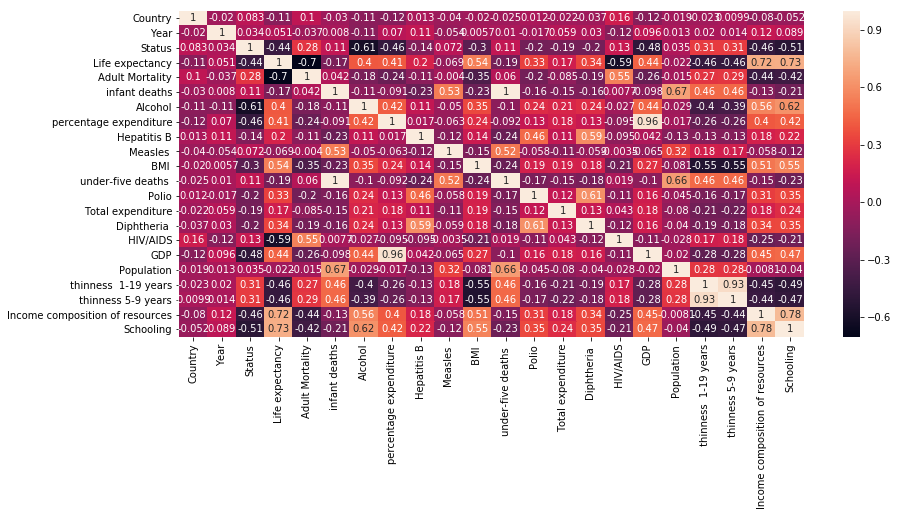

In [107]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True)


<h1>Setting 'Life expectancy' as label(data that is to be predicted)</h1>

In [108]:
labels = df['Life expectancy']

<h1>Setting all the columns except 'Life expectancy' as features</h1>

In [109]:
features = df.drop('Life expectancy', axis=1)

In [110]:
labels

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
        ... 
2853    69.6
2854    69.4
2855    69.3
2856    69.1
2857    69.0
2907    61.1
2908    63.0
2909    59.2
2910    58.2
2911    58.0
2912    57.4
2913    55.7
2914    52.6
2915    58.0
2916    49.3
2923    59.2
2924    58.0
2925    56.6
2926    54.9
2927    52.4
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 1649, dtype: float64

In [111]:
labels.isnull().value_counts()

False    1649
Name: Life expectancy, dtype: int64

<h1>Splitting the data into training data and testing data</h1>

In [112]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.2,random_state=0)

<h1>Fitting linear regression model with training data and then predicting label values for test data</h1>

In [113]:
modelLR = LinearRegression()
modelLR.fit(features_train,labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
labels_predLR = modelLR.predict(features_test)
labels_predLR


array([59.63154981, 76.18222923, 71.49548636, 55.58618873, 61.82220024,
       83.64151597, 49.99367243, 62.0598755 , 42.52269355, 74.12488887,
       76.3131359 , 74.28016632, 78.60483766, 70.35115876, 84.6217232 ,
       45.13446929, 46.27259159, 68.88376341, 73.55918915, 68.03832479,
       79.79877764, 72.04285459, 65.44677233, 73.60645318, 72.07867379,
       62.54745037, 63.84180662, 54.11014555, 77.22470607, 71.07531833,
       70.96426912, 52.1675706 , 60.04717728, 70.62599607, 71.88598964,
       71.06195236, 71.10450321, 78.84670005, 78.28890412, 51.37636032,
       79.96911382, 63.84875161, 76.20167829, 72.95491349, 88.67003536,
       80.25185206, 55.25261467, 71.06166726, 71.86215353, 80.56757002,
       64.69402987, 70.37740464, 58.05994929, 78.45648142, 68.08273193,
       77.36201243, 73.59820974, 76.93313389, 70.05519001, 66.53687153,
       72.83943961, 68.08919478, 67.98521616, 78.61918301, 74.79421678,
       81.23866487, 70.79438938, 69.55886005, 71.18728907, 72.71

In [115]:
accLR = r2_score(labels_test,labels_predLR)
print('Accuracy of linear regression model is',accLR)


Accuracy of linear regression model is 0.8558324161735404


<h1>Fitting random forest regression model with training data and then predicting label values for test data</h1>

In [116]:
modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(features_train,labels_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [130]:
labels_predRF = modelRF.predict(features_test)
accRF = r2_score(labels_test,labels_predRF)
print('Accuracy of Random Forest Regression model is', accRF) #Since accuracy is more with random forest regression. Hence, this will be used as final model and will be deployed 

Accuracy of Random Forest Regression model is 0.9605672440270765


<h1>Model deployment to IBM Watson</h1>

In [119]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [120]:
wml_credentials = {
  "apikey": "*******************",
  "iam_apikey_description": "Auto-generated for key ********************",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "***********************",
  "iam_serviceid_crn": "****************************************",
  "instance_id": "*****************************",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [121]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [122]:
meta_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME : 'Tushar',
    client.repository.ModelMetaNames.AUTHOR_EMAIL : 'vermatushar291@gmail.com',
    client.repository.ModelMetaNames.NAME : 'Life Expectancy Rate'
}

In [123]:
model_artifact = client.repository.store_model(modelRF, meta_props = meta_props)

In [124]:
guid = model_artifact['metadata']['guid']

In [125]:
deploy = client.deployments.create(guid,'Life Expectancy Rate')



#######################################################################################

Synchronous deployment creation for uid: '85d94a19-7cca-41cc-9170-66b19355a02b' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ff0074d9-14b6-4bdc-8cd1-a5f1c904ea47'
------------------------------------------------------------------------------------------------




In [126]:
deploy

{'metadata': {'guid': 'ff0074d9-14b6-4bdc-8cd1-a5f1c904ea47',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0dd52d3f-5f6a-4452-b85b-0972e5671048/deployments/ff0074d9-14b6-4bdc-8cd1-a5f1c904ea47',
  'created_at': '2020-06-07T13:20:42.103Z',
  'modified_at': '2020-06-07T13:20:42.400Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Life Expectancy Rate',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0dd52d3f-5f6a-4452-b85b-0972e5671048/deployments/ff0074d9-14b6-4bdc-8cd1-a5f1c904ea47/online',
  'deployable_asset': {'name': 'Life Expectancy Rate',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0dd52d3f-5f6a-4452-b85b-0972e5671048/published_models/85d94a19-7cca-41cc-9170-66b19355a02b',
   'guid': '85d94a19-7cca-41cc-9170-66b19355a02b',
   'created_at': '2020-06-07T13:20:42.075Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.20',
 

In [127]:
scoring_url = deploy['entity']['scoring_url']

In [128]:
scoring_url

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0dd52d3f-5f6a-4452-b85b-0972e5671048/deployments/ff0074d9-14b6-4bdc-8cd1-a5f1c904ea47/online'